In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import classification_report, mean_absolute_error

In [16]:
def classify_score(score: int):
    if score > 0:
        return 1
    # elif score == 0:
    #     return 0
    elif score <= 0:
        return 0

In [17]:
train_df = pd.read_csv('data/sample_train.csv')
test_df = pd.read_csv('data/sample_test.csv')
train_df['question_full_text'] = train_df['question_title'] + ' ' + train_df['question_cleaned_text']
test_df['question_full_text'] = test_df['question_title'] + ' ' + test_df['question_cleaned_text']
train_df['score_class'] = train_df['answer_score'].apply(classify_score)
test_df['score_class'] = test_df['answer_score'].apply(classify_score)

In [18]:
train_df['score_class'].value_counts(normalize=True)

1    0.66289
0    0.33711
Name: score_class, dtype: float64

In [19]:
test_df['score_class'].value_counts(normalize=True)

1    0.657508
0    0.342492
Name: score_class, dtype: float64

In [7]:
vectorizer = TfidfVectorizer()
vectorizer.fit(pd.concat([train_df['question_full_text'], train_df['answer_cleaned_text']]))

TfidfVectorizer()

In [20]:
X_train = hstack([vectorizer.transform(train_df['question_full_text']), vectorizer.transform(train_df['answer_cleaned_text'])])
y_train = train_df['score_class']
X_test = hstack([vectorizer.transform(test_df['question_full_text']), vectorizer.transform(test_df['answer_cleaned_text'])])
y_test = test_df['score_class']

In [52]:
lr_model = LogisticRegression(max_iter=1000)
lr_model = lr_model.fit(X_train, y_train)

In [53]:
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.50      0.22      0.30      6706
           1       0.68      0.88      0.77     12874

    accuracy                           0.66     19580
   macro avg       0.59      0.55      0.54     19580
weighted avg       0.62      0.66      0.61     19580


In [26]:
gb_model = XGBClassifier(n_estimators=10000, device='cuda')
gb_model = gb_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, gb_model.predict(X_test)))

<AxesSubplot:>

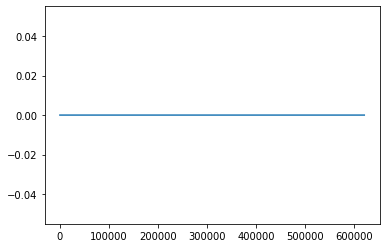

In [25]:
pd.Series(lr_model.coef_).plot()

<AxesSubplot:>

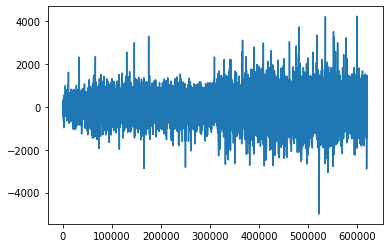

In [19]:
pd.Series(lr_model.coef_).plot()